In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('Monday-WorkingHours.pcap_ISCX.csv')
df2 = pd.read_csv('Tuesday-WorkingHours.pcap_ISCX.csv')
df3 = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv')
df4 = pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
df5 = pd.read_csv('Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
df6 = pd.read_csv('Friday-WorkingHours-Morning.pcap_ISCX.csv')
df7 = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df8 = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [ ]:
df_list = [df1, df2, df3, df4, df5, df6, df7, df8]

print('data shape')
for i, df in enumerate(df_list, start = 1):
  rows, cols = df.shape
  print(f'df{i} -> {rows} rows, {cols} columns')

data shape
df1 -> 529918 rows, 79 columns
df2 -> 445909 rows, 79 columns
df3 -> 692703 rows, 79 columns
df4 -> 170366 rows, 79 columns
df5 -> 288602 rows, 79 columns
df6 -> 191033 rows, 79 columns
df7 -> 286467 rows, 79 columns
df8 -> 225745 rows, 79 columns


In [ ]:
#모든 csv파일의 dimensions 같아 concat
df = pd.concat(df_list)
rows, cols = df.shape

print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')
df.head()

Number of rows: 2830743
Number of columns: 79
Total cells: 223628697


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# Deleting dataframes after concating to save memory
for d in df_list: del d

In [ ]:
# columns이름에서 앞뒤 공백제거
col_names = {col: col.strip() for col in df.columns}
df.rename(columns = col_names, inplace = True)

In [ ]:
df.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [ ]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
df.describe().transpose()

Overview of Columns:


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03
Fwd Packet Length Mean,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.000000,34.000000,5.000000e+01,5.940857e+03
Fwd Packet Length Std,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.000000,0.000000,2.616295e+01,7.125597e+03


In [ ]:
pd.options.display.max_columns = 80
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3.000000e+06,5.000000e+05,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,5.000000e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,6.666667e+05,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,6.666667e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.967213e+05,3.278689e+04,61.0,0.0,61,61,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.639344e+04,16393.44262,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.666667e+05,2.777778e+04,72.0,0.0,72,72,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.388889e+04,13888.88889,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.600000e+05,2.666667e+04,75.0,0.0,75,75,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.333333e+04,13333.33333,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,2.500000e+05,4.166667e+04,48.0,0.0,48,48,48,48.0,0.0,48,48,0,0.0,0.0,0,0,0,0,0,0,40,0,4.166667e+04,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,4719,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
#duplicated value 체크
dups = df[df.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 308381


In [ ]:
df.drop_duplicates(inplace = True)
df.shape

(2522362, 79)

In [ ]:
#NA또는 NaN인 값 체크
missing_val = df.isna().sum()
print(missing_val.loc[missing_val > 0])#결측치가 하나라도 있으면 출력

Flow Bytes/s    353
dtype: int64


In [ ]:
# 무한대(inf,-inf) 값 체크
numeric_cols = df.select_dtypes(include = np.number).columns
inf_count = np.isinf(df[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      1211
Flow Packets/s    1564
dtype: int64


In [ ]:
# inf를 nan로 바꾸기
print(f'Initial missing values: {df.isna().sum().sum()}')

df.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {df.isna().sum().sum()}')

Initial missing values: 353
Missing values after processing infinite values: 3128


In [ ]:
missing = df.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      1564
Flow Packets/s    1564
dtype: int64


In [ ]:
# 결측치 비율 체크
mis_per = (missing / len(df)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                Missing Values  Percentage of Total Values
Flow Bytes/s              1564                        0.06
Flow Packets/s            1564                        0.06


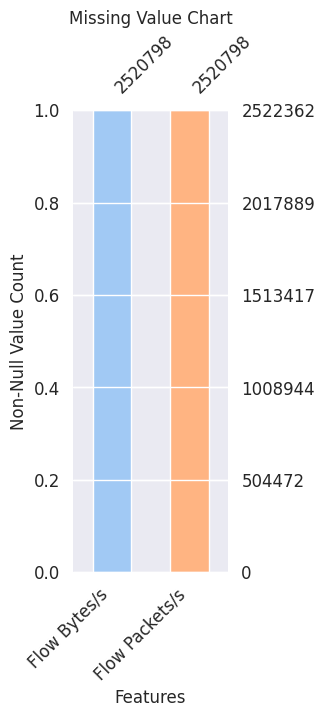

In [ ]:
import missingno as msno
sns.set(style='darkgrid')

sns.set_palette('pastel')
colors = sns.color_palette()
#결측치 시각화
missing_vals = [col for col in df.columns if df[col].isna().any()]

fig, ax = plt.subplots(figsize = (2, 6))
msno.bar(df[missing_vals], ax = ax, fontsize = 12, color = colors)
ax.set_xlabel('Features', fontsize = 12)
ax.set_ylabel('Non-Null Value Count', fontsize = 12)
ax.set_title('Missing Value Chart', fontsize = 12)
plt.show()

In [ ]:
duplicate_columns = df.columns[df.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)


Duplicate columns: Index([], dtype='object')


In [ ]:
# 중복된 인덱스 찾기
duplicate_index = df.index[df.index.duplicated()]

# 중복된 인덱스 출력
print("Duplicate index:", duplicate_index)


Duplicate index: Index([     0,      1,      4,      5,      8,      9,     10,     11,     12,
           13,
       ...
       225735, 225736, 225737, 225738, 225739, 225740, 225741, 225742, 225743,
       225744],
      dtype='int64', length=1847379)


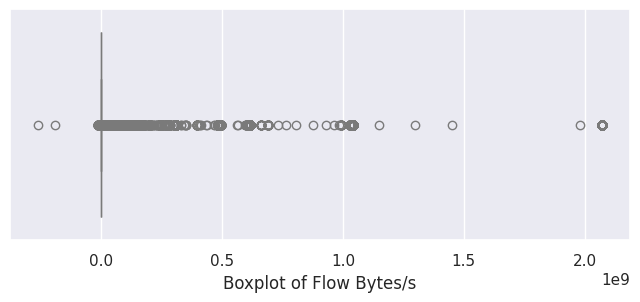

In [ ]:
# Check for duplicate indices and reset the index if necessary
if df.index.duplicated().any():
    print("Warning: DataFrame contains duplicate indices. Resetting index.")
    df = df.reset_index(drop=True)  # Reset the index, optionally dropping the old index

# Now try to plot the boxplot
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['Flow Bytes/s'])
plt.xlabel('Boxplot of Flow Bytes/s')
plt.show()

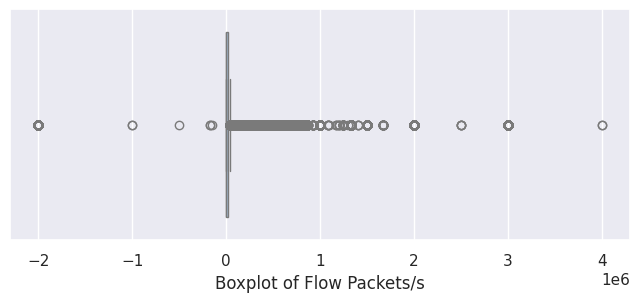

In [ ]:
plt.figure(figsize = (8, 3))
sns.boxplot(x = df['Flow Packets/s'])
plt.xlabel('Boxplot of Flow Packets/s')
plt.show()


In [ ]:
#Flow Bytes/s, Flow Packets/s 의 중앙값 찾기

med_flow_bytes = df['Flow Bytes/s'].median()
med_flow_packets = df['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  3715.0378579999997
Median of Flow Packets/s:  69.742244285


In [ ]:
# na를 중앙값으로 채우기
df['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
df['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

In [ ]:
print('Number of \'Flow Bytes/s\' missing values:', df['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', df['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


In [ ]:
# Label 종류, 수 확인
df['Label'].value_counts()

,count
Label,
BENIGN,2096484
DoS Hulk,172849
DDoS,128016
PortScan,90819
DoS GoldenEye,10286
FTP-Patator,5933
DoS slowloris,5385
DoS Slowhttptest,5228
SSH-Patator,3219


In [ ]:
# 이름이 이상한 Label 바꾸기
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

In [ ]:
# Label column 없애고 Attack Type로 변경
df['Attack Type'] = df['Label'].map(attack_map)
df.drop('Label', axis = 1, inplace = True)
df['Attack Type'].value_counts()



,count
Attack Type,
BENIGN,2096484
DoS,193748
DDoS,128016
Port Scan,90819
Brute Force,9152
Web Attack,2143
Bot,1953
Infiltration,36
Heartbleed,11


In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Attack Number'] = le.fit_transform(df['Attack Type'])

print(df['Attack Number'].unique())

encoded_values = df['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

[0 2 4 5 8 6 1 7 3]
0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [ ]:
#상관계수 확인
corr = df.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

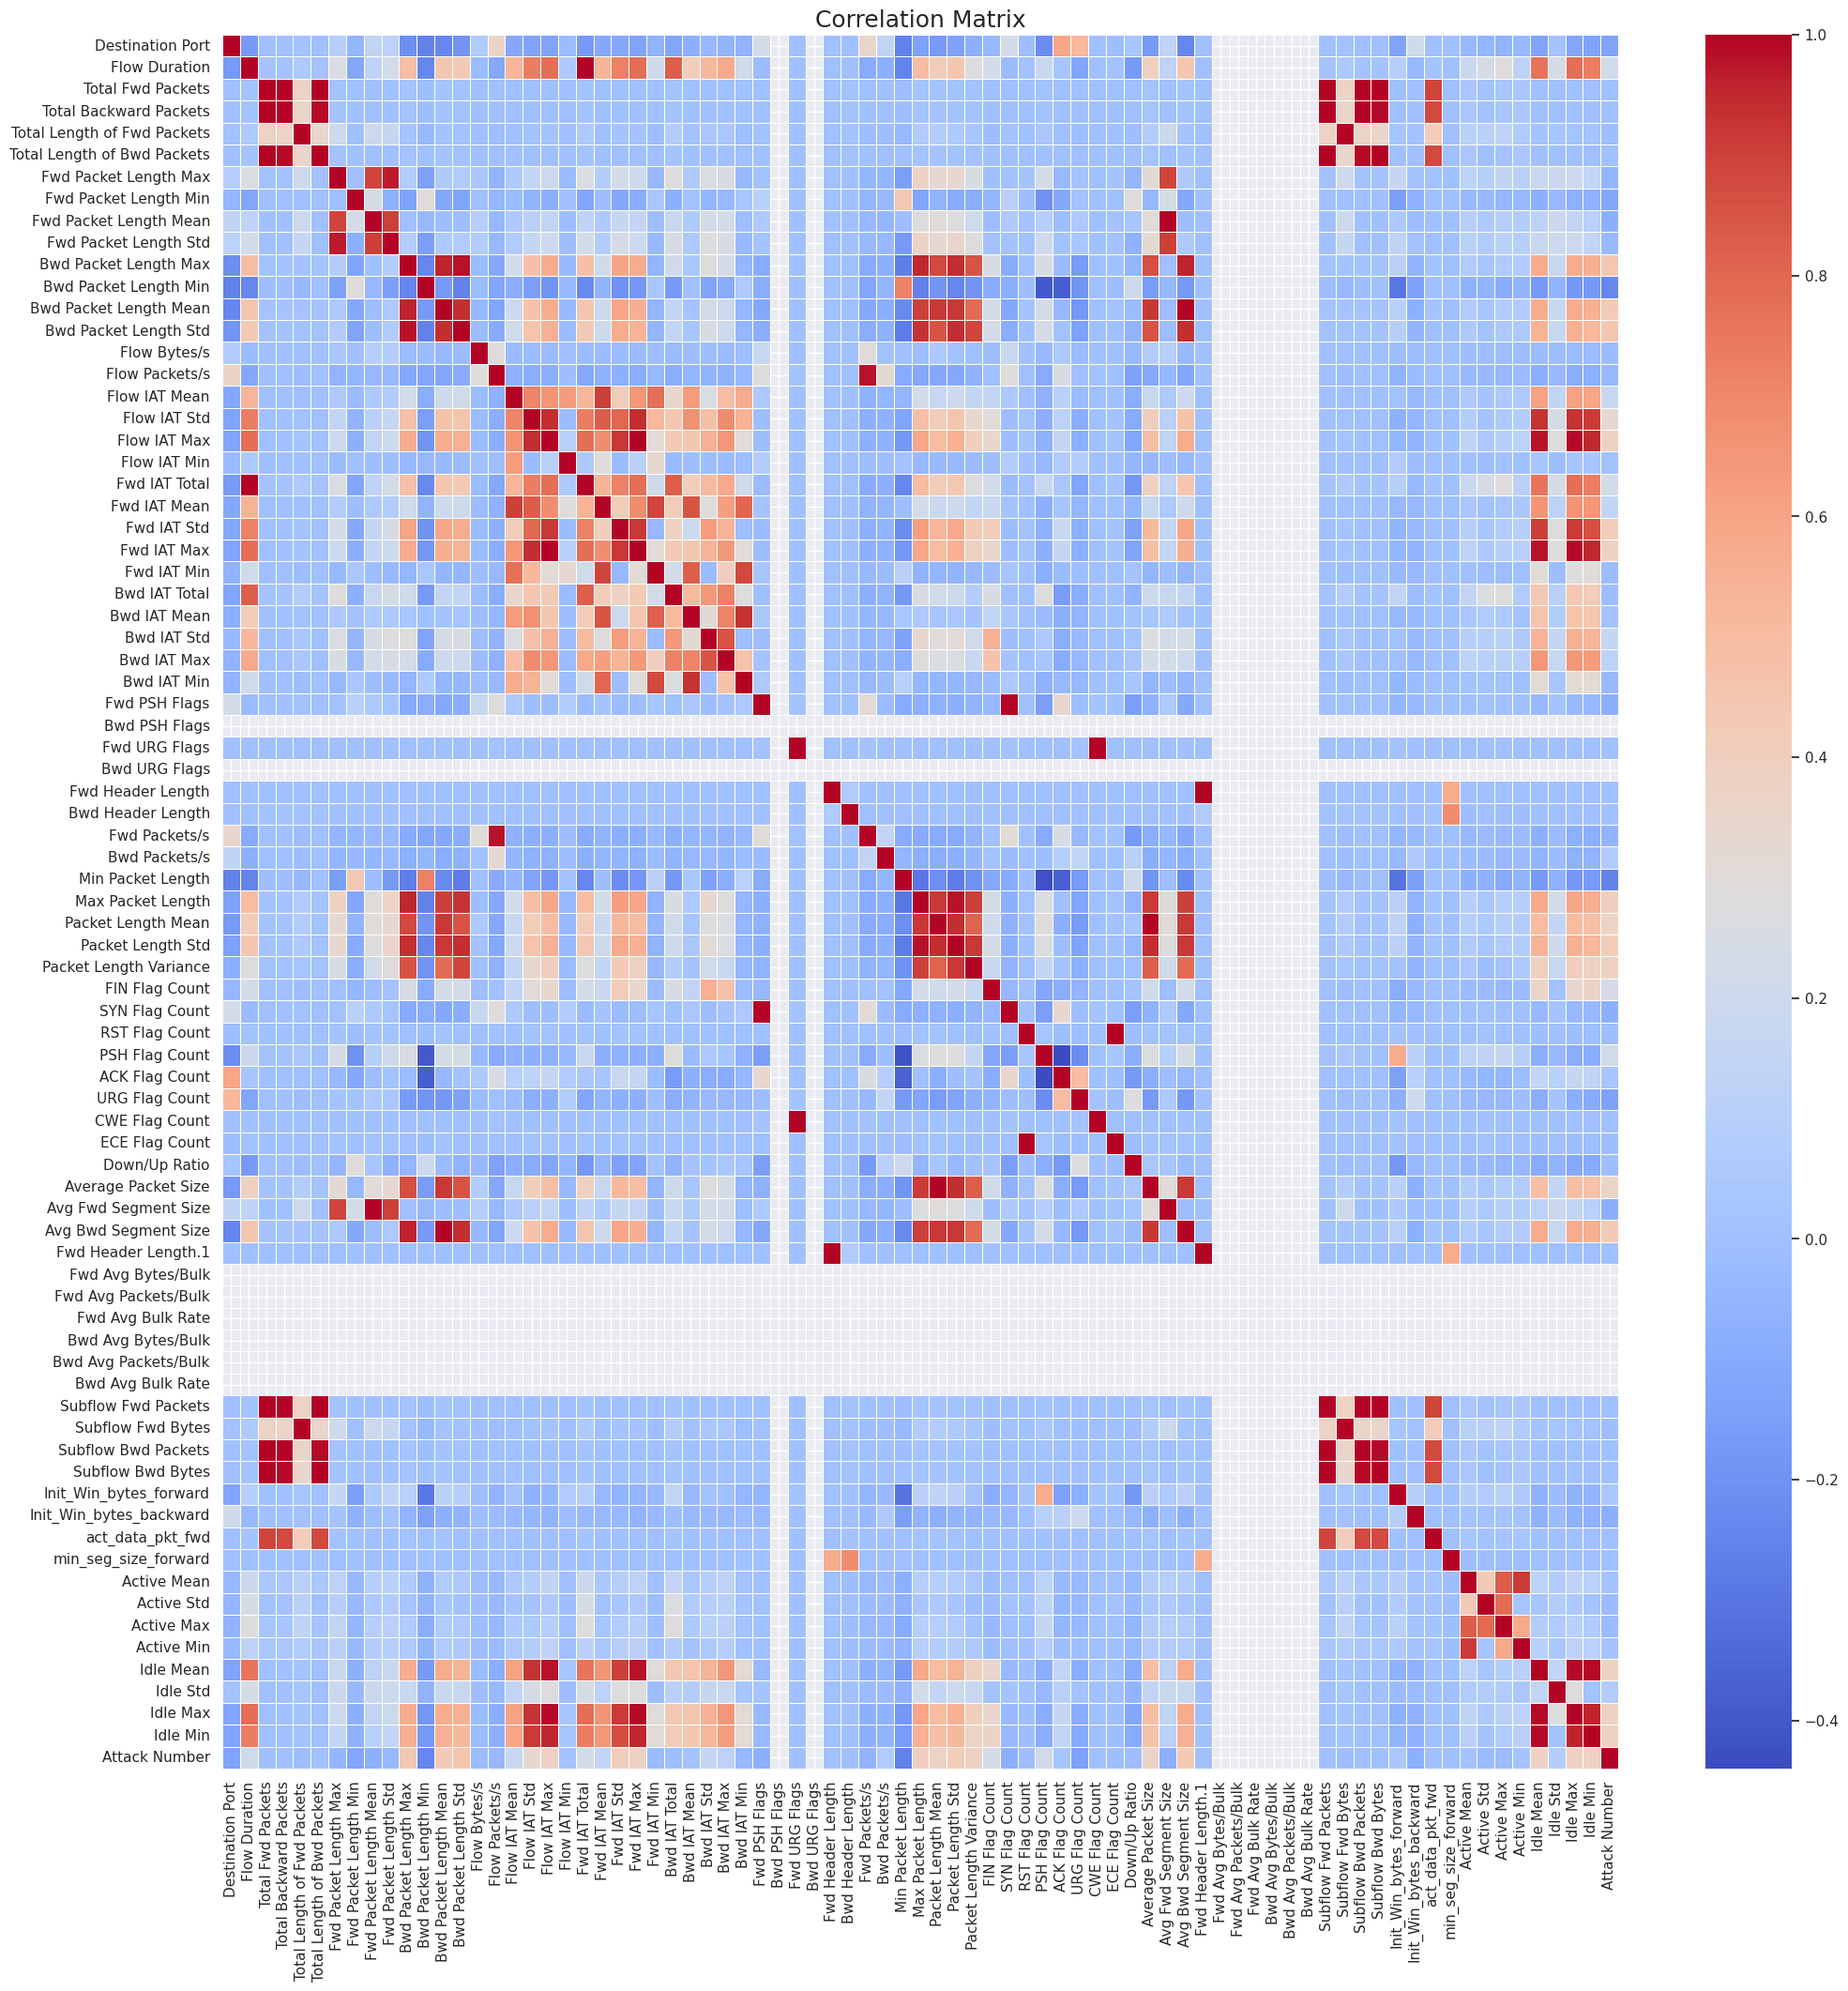

In [ ]:
#heatmap으로 표현하기
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [ ]:
# 양의 상관계수
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  Flow Duration            :0.21
2.  Bwd Packet Length Max    :0.44
3.  Bwd Packet Length Mean   :0.43
4.  Bwd Packet Length Std    :0.45
5.  Flow IAT Mean            :0.17
6.  Flow IAT Std             :0.33
7.  Flow IAT Max             :0.38
8.  Flow IAT Min             :0.01
9.  Fwd IAT Total            :0.22
10. Fwd IAT Mean             :0.15
11. Fwd IAT Std              :0.41
12. Fwd IAT Max              :0.38
13. Bwd IAT Mean             :0.01
14. Bwd IAT Std              :0.16
15. Bwd IAT Max              :0.12
16. Bwd Packets/s            :0.07
17. Max Packet Length        :0.4
18. Packet Length Mean       :0.37
19. Packet Length Std        :0.41
20. Packet Length Variance   :0.38
21. FIN Flag Count           :0.23
22. PSH Flag Count           :0.21
23. ACK Flag Count           :0.03
24. Average Packet Size      :0.36
25. Avg Bwd Segment Size     :0.43
26. Init_Win_bytes_forward   :0.04
27. Active Mean              :0.0

In [ ]:
# 표준편차가 0인 features(heatmap의 빈칸) 찾기
std = df.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [ ]:
# Data 샘플 만들기 20%
sample_size = int(0.2 * len(df)) # 20% of the original size
sampled_data = df.sample(frac=0.2,random_state = 0)
sampled_data.shape

(504472, 80)

In [ ]:
""" sample이 얼마나 원본 데이터를 잘 대표하는지.
outlier는 얼마나 있는 지
"""

' sample이 얼마나 원본 데이터를 잘 대표하는지.\noutlier는 얼마나 있는 지\n'

<ipython-input-38-eb9ed8dc7cbc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)


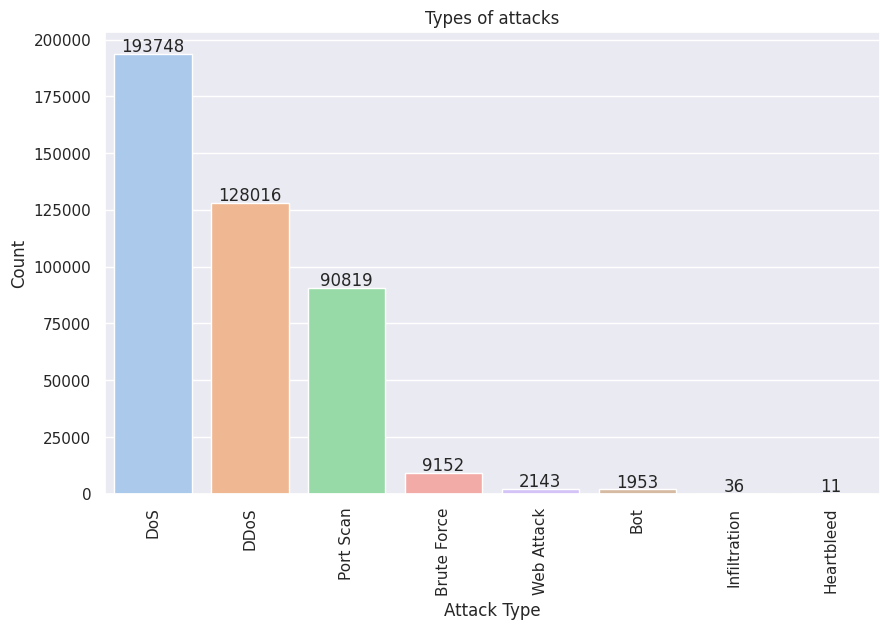

In [ ]:
# B'EBIGN' 빼고 공격유형 히스토그램
attacks = df.loc[df['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

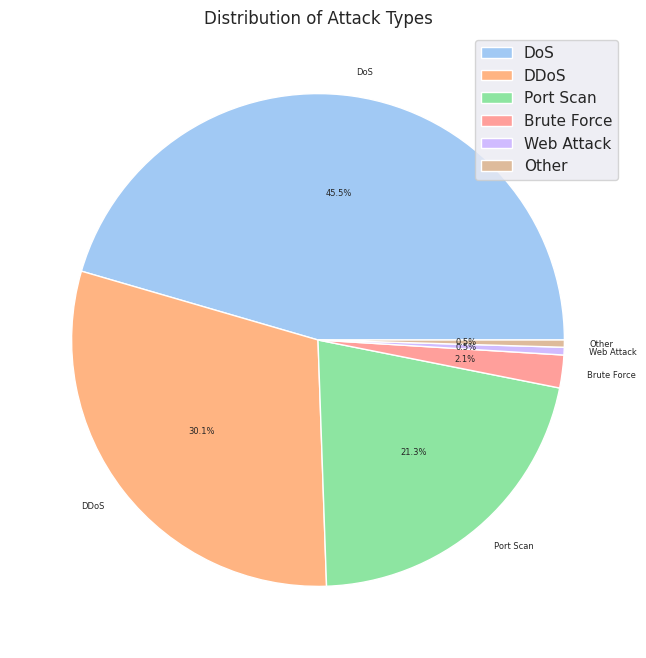

In [ ]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

In [ ]:
df.groupby('Attack Type').first()#공격 타입으로 묶고 1번째 행 선택

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack Number
Attack Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BENIGN,49188,4,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,3.000000e+06,500000.000000,4.000000e+00,0.000000e+00,4,4,4,4.000000e+00,0.000000e+00,4,4,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,40,0,500000.000000,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.00000,0,0,0.0,0.00000,0,0,0
Bot,8080,60202640,9,9,322,256,322,0,35.777778,107.333333,256,0,28.444444,85.333333,9.600908e+00,0.298990,3.541332e+06,4.901981e+06,10200000,47,51200000,6.396442e+06,5.268490e+06,10200000,234,60200000,7.518954e+06,4.645137e+06,10300000,637,0,0,0,0,296,296,0.149495,0.149495,0,322,30.421053,91.783753,8.424257e+03,0,0,0,1,0,0,0,0,1,32.111111,35.777778,28.444444,296,0,0,0,0,0,0,9,322,9,256,29200,110,1,32,63678.2,22252.53596,103175,50911,10200000.0,34941.27201,10200000,10100000,1
Brute Force,80,5216127,3,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,0.766852,1.738709e+06,3.010454e+06,5214882,124,5216127,2.608064e+06,3.686598e+06,5214882,1245,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,104,40,0.575139,0.191713,0,0,0.000000,0.000000,0.000000e+00,0,0,0,1,0,0,0,0,0,0.000000,0.000000,0.000000,104,0,0,0,0,0,0,3,0,1,0,29200,28960,0,32,0.0,0.00000,0,0,0.0,0.00000,0,0,2
DDoS,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,5840,0,1658.142857,2137.297080,8.991399e+03,7.729218,1.437547e+05,4.308658e+05,1292730,2,747,3.735000e+02,5.239661e+02,744,3,1293746,2.156243e+05,5.276719e+05,1292730,2,0,0,0,0,72,152,2.318765,5.410452,0,5840,1057.545455,1853.437529,3.435231e+06,0,0,0,1,0,0,0,0,2,1163.300000,8.666667,1658.142857,72,0,0,0,0,0,0,3,26,7,11607,8192,229,2,20,0.0,0.00000,0,0,0.0,0.00000,0,0,3
DoS,80,5169956,8,6,1101,4222,410,0,137.625000,185.758628,3525,0,703.666667,1395.868284,1.029603e+03,2.707953,3.976889e+05,1.368409e+06,4951173,112,218783,3.125471e+04,3.068629e+04,78311,219,5169833,1.033967e+06,2.218975e+06,5002421,840,0,0,0,0,172,132,1.547402,1.160551,0,3525,354.866667,895.115146,8.012311e+05,0,0,0,1,0,0,0,0,0,380.214286,137.625000,703.666667,172,0,0,0,0,0,0,8,1101,6,4222,8192,254,7,20,0.0,0.00000,0,0,0.0,0.00000,0,0,4
Heartbleed,444,119302728,2685,1729,8299,7556917,517,0,3.090875,16.858421,17376,0,4370.686524,2566.935004,6.341193e+04,36.998316,2.703438e+04,1.746258e+05,5024984,0,119000000,4.444951e+04,2.224617e+05,5025702,0,119000000,6.904091e+04,2.738674e+05,5024984,1,0,0,0,0,85928,55336,22.505772,14.492544,0,17376,1713.525708,2669.389319,7.125639e+06,0,0,0,1,0,0,0,0,0,1713.913910,3.090875,4370.686524,85928,0,0,0,0,0,0,2685,8299,1729,7556917,29200,235,118,32,2217.0,0.00000,22

Data Preprocessing

In [ ]:
# float 64 ->float32, int64,int32로 다운캐스팅
old_memory_usage = df.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in df.columns:
    col_type = df[col].dtype
    if col_type != object:
        c_min = df[col].min()
        c_max = df[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            df[col] = df[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            df[col] = df[col].astype(np.int32)

new_memory_usage = df.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")


Initial memory usage: 1539.53 MB
Final memory usage: 798.63 MB


In [ ]:
# 고유값이 하나인 컬럼 제거
num_unique = df.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
df = df[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [ ]:
df.shape

(2522362, 72)

PCA to reduce dimensions

In [ ]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = df.drop('Attack Type', axis = 1)
attacks = df['Attack Type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2 #차원 절반 축소
ipca = IncrementalPCA(n_components = size, batch_size = 500)#500개 씩 배치 단위
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.08%


In [ ]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values

In [ ]:
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,Attack Type
0,-2.390979,-0.054142,0.569875,0.608032,3.748798,0.193173,-0.016745,-0.214749,-0.249818,1.072820,0.027764,0.072717,1.631085,0.341142,-0.651065,-0.219538,-0.021560,0.856945,-1.010637,-0.494206,-0.231351,0.392588,-1.322745,-1.155252,0.426982,-0.203502,0.707226,0.167883,-0.518800,1.451156,-0.156591,0.262873,0.001385,0.002666,-0.014743,BENIGN
1,-2.913872,-0.069280,0.888999,1.462739,8.890884,0.517774,-0.061181,1.115094,1.970735,-2.750156,-0.938309,-0.856632,6.064292,1.648550,-4.436560,0.457313,0.126661,2.744867,-1.251672,-1.175413,0.449872,-0.181980,-3.095385,-4.359373,-0.747583,1.647961,0.214982,-0.017288,-2.543196,2.112990,-0.649356,0.563292,0.027271,0.000827,-0.020609,BENIGN
2,-2.449933,-0.055862,0.606199,0.704919,4.325623,0.227464,-0.021853,-0.068832,-0.002663,0.652011,-0.079217,-0.030004,2.127053,0.486180,-1.069720,-0.145599,-0.005278,1.067408,-1.040237,-0.570533,-0.156835,0.327739,-1.521185,-1.511857,0.292344,0.000146,0.656176,0.150637,-0.732336,1.525840,-0.208474,0.294626,0.004077,0.002472,-0.015138,BENIGN
3,-2.914726,-0.069319,0.889864,1.464659,8.896365,0.515998,-0.061352,1.113251,1.971161,-2.746190,-0.937948,-0.856092,6.067683,1.648321,-4.434604,0.456047,0.126475,2.745560,-1.254490,-1.176051,0.448696,-0.182989,-3.096865,-4.359964,-0.751714,1.645890,0.218626,-0.013960,-2.531800,2.114137,-0.646487,0.561665,0.027086,0.000837,-0.020353,BENIGN
4,-1.538079,0.080213,-0.489878,0.320055,-0.525546,0.755004,0.100991,0.729182,-1.141042,-0.572120,-0.042371,-0.208746,-0.431690,0.058894,-0.612646,-0.182541,-0.043138,-0.489221,-0.067839,0.195739,-0.115099,-0.052994,0.234367,-0.015421,-0.121340,-0.398819,-0.239837,-0.782527,0.348497,0.860799,-0.178431,-0.246678,-0.026624,0.000898,0.022294,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522357,-2.304647,-0.047668,0.476010,0.385633,2.175687,-0.164691,-0.015810,-0.779535,-0.897969,2.692285,0.402762,0.417807,0.976069,-0.162212,0.984885,-0.124635,-0.012811,0.390389,-0.437485,-0.139683,-0.404873,0.813215,-0.815716,0.029081,0.471459,-0.179731,0.614358,0.472443,0.588583,0.787838,0.261563,-0.053321,-0.018226,0.001904,-0.001623,BENIGN
2522358,-2.301679,-0.047573,0.474787,0.383356,2.155614,-0.166606,-0.015741,-0.782345,-0.900963,2.698772,0.405266,0.420720,0.943108,-0.170048,1.002846,-0.137057,-0.015166,0.377361,-0.468034,-0.159414,-0.409050,0.834273,-0.815270,0.001444,0.458927,-0.172247,0.617024,0.477510,0.587569,0.788610,0.262761,-0.053720,-0.018305,0.001906,-0.000911,BENIGN
2522359,-2.301010,-0.047552,0.474510,0.382820,2.151095,-0.167023,-0.015725,-0.782962,-0.901615,2.700166,0.405815,0.421362,0.935759,-0.171781,1.006808,-0.139803,-0.015687,0.374467,-0.474789,-0.163777,-0.409971,0.838951,-0.815152,-0.004662,0.456153,-0.170581,0.617562,0.478571,0.587203,0.788784,0.262980,-0.053784,-0.018320,0.001906,-0.000755,BENIGN
2522360,-2.135438,-0.041386,0.357036,0.207592,1.803137,0.264473,0.006410,-0.297039,-0.613434,0.952894,0.077112,0.115930,-0.174846,0.112663,-0.160169,-0.683337,-0.117070,-0.130666,-0.963408,-0.056482,-0.551410,-0.047130,-0.445903,-0.467596,0.374285,-0.898459,0.657317,0.305405,1.751218,-0.857851,0.304591,-0.201020,-0.011825,0.002121,0.053010,BENIGN


In [ ]:
# DataFrame을 CSV 파일로 저장
#new_data.to_csv('transformed_features.csv', index=False)

Machine Learning Models

In [ ]:
# 이진분류를 위한 balanced 데이터셋 만들기
normal_traffic = new_data.loc[new_data['Attack Type'] == 'BENIGN']
intrusions = new_data.loc[new_data['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)#intrusion과 동일한 수의 nomal_traffic을 추출.replace = False는 복원추출x(동일샘플중복x)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)#이진분류를 위함. Benign
balanced_data = ids_data.sample(n = 15000)

print(balanced_data['Attack Type'].value_counts())

In [ ]:
# Split data features (X) and target (y)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X_bc = balanced_data.drop('Attack Type', axis = 1)
y_bc = balanced_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)

Logistic Regression (Binary Classification)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr1 = LogisticRegression(max_iter = 10000, C = 0.1, random_state = 0, solver = 'saga')
lr1.fit(X_train_bc, y_train_bc)

cv_lr1 = cross_val_score(lr1, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr1)))
print(f'\nMean cross-validation score: {cv_lr1.mean():}')

# 테스트 데이터로 예측
y_pred_test = lr1.predict(X_test_bc)

#lr1 테스트 데이터로 확인하기

test_score = lr1.score(X_test_bc, y_test_bc)
print(f'\nTest data accuracy: {test_score}')

# F1 스코어 계산 및 출력
f1 = f1_score(y_test_bc, y_pred_test)
print(f'F1 Score on test data: {f1:.4f}')

Logistic regression Model 1

Cross-validation scores: 0.9986666666666667, 1.0, 0.9982222222222222, 0.9964444444444445, 0.9986666666666667

Mean cross-validation score: 0.9984

Test data accuracy: 0.9978666666666667
F1 Score on test data: 0.9979


Support Vector Machine (Binary Classification)

In [ ]:
from sklearn.svm import SVC

svm1 = SVC(kernel = 'poly', C = 1, random_state = 0, probability = True)
svm1.fit(X_train_bc, y_train_bc)

cv_svm1 = cross_val_score(svm1, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm1)))
print(f'\nMean cross-validation score: {cv_svm1.mean():.2f}')

#svm1 모델 테스트 데이터로 확인하기

test_score = svm1.score(X_test_bc, y_test_bc)
print(f'\nTest data accuracy: {test_score}')

# F1 스코어 계산 및 출력
f1 = f1_score(y_test_bc, y_pred_test)
print(f'F1 Score on test data: {f1:.4f}')

Support Vector Machine Model 1

Cross-validation scores: 0.9866666666666667, 0.9862222222222222, 0.984, 0.9804444444444445, 0.9857777777777778

Mean cross-validation score: 0.98

Test data accuracy: 0.9837333333333333
F1 Score on test data: 0.9979


Multi-class Classification

In [ ]:
new_data['Attack Type'].value_counts()

,count
Attack Type,
BENIGN,2096484
DoS,193748
DDoS,128016
Port Scan,90819
Brute Force,9152
Web Attack,2143
Bot,1953
Infiltration,36
Heartbleed,11


In [ ]:
#데이터가 1950 넘는 항목만 5000개 샘플링

class_counts = new_data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 1950]
class_names = selected_classes.index
selected = new_data[new_data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['Attack Type'] == name]
  if len(df) > 2500:
    df = df.sample(n = 5000, random_state = 0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)
df['Attack Type'].value_counts()

,count
Attack Type,
BENIGN,5000
DoS,5000
DDoS,5000
Port Scan,5000
Brute Force,5000
Web Attack,2143
Bot,1953


In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

blnc_data = pd.DataFrame(X_upsampled)
blnc_data['Attack Type'] = y_upsampled
blnc_data = blnc_data.sample(frac=1)

blnc_data['Attack Type'].value_counts()

,count
Attack Type,
Port Scan,5000
Bot,5000
DDoS,5000
DoS,5000
BENIGN,5000
Brute Force,5000
Web Attack,5000


In [ ]:
features = blnc_data.drop('Attack Type', axis = 1)
labels = blnc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(n_estimators = 10, max_depth = 6, max_features = None, random_state = 0)
rf1.fit(X_train, y_train)

cv_rf1 = cross_val_score(rf1, X_train, y_train, cv = 5)
print('Random Forest Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf1)))
print(f'\nMean cross-validation score: {cv_rf1.mean():}')

#rf1 모델 테스트 데이터로 확인하기

test_score = rf1.score(X_test,y_test)
print(f'\nTest data accuracy: {test_score}')



Random Forest Model 1

Cross-validation scores: 0.9786666666666667, 0.9820952380952381, 0.9775238095238096, 0.9788571428571429, 0.9784761904761905

Mean cross-validation score: 0.9791238095238096

Test data accuracy: 0.9772571428571428


K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors = 16)
knn1.fit(X_train, y_train)

cv_knn1 = cross_val_score(knn1, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn1)))
print(f'\nMean cross-validation score: {cv_knn1.mean():}')

#knn1 모델 테스트 데이터로 확인하기

test_score = knn1.score(X_test,y_test)
print(f'\nTest data accuracy: {test_score}')

K Nearest Neighbors Model 1

Cross-validation scores: 0.9891428571428571, 0.9895238095238095, 0.9889523809523809, 0.9893333333333333, 0.9895238095238095

Mean cross-validation score: 0.989295238095238

Test data accuracy: 0.9907428571428571


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth = 6)
dt1.fit(X_train, y_train)

cv_dt1 = cross_val_score(dt1, X_train, y_train, cv = 5)
print('Decision Tree Model 1')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt1)))
print(f'\nMean cross-validation score: {cv_dt1.mean():.2f}')

#dt1 모델 테스트 데이터로 확인하기

test_score = dt1.score(X_test,y_test)
print(f'\nTest data accuracy: {test_score}')

Decision Tree Model 1

Cross-validation scores: 0.9780952380952381, 0.9788571428571429, 0.9754285714285714, 0.9746666666666667, 0.9756190476190476

Mean cross-validation score: 0.98

Test data accuracy: 0.9752


Performance Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report,roc_auc_score, roc_curve, auc, precision_recall_curve

Logistic Regression Models Evaluation

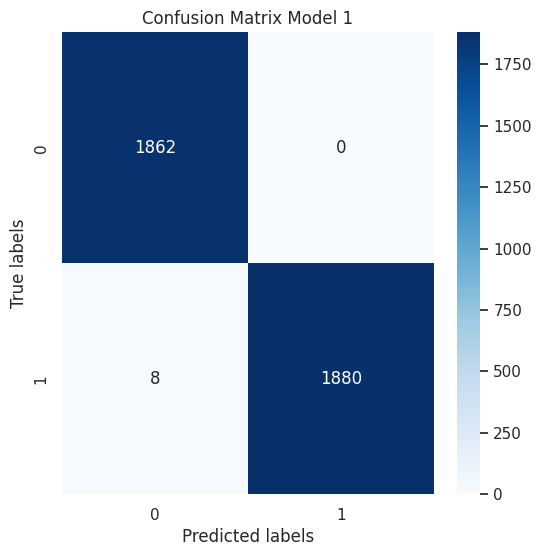

In [ ]:
y_pred_lr1 = lr1.predict(X_test_bc)
conf_matrix_model1 = confusion_matrix(y_test_bc, y_pred_lr1)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# 혼동 행렬 시각화
sns.heatmap(conf_matrix_model1, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix Model 1')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()


Support Vector Machine Models Evaluation



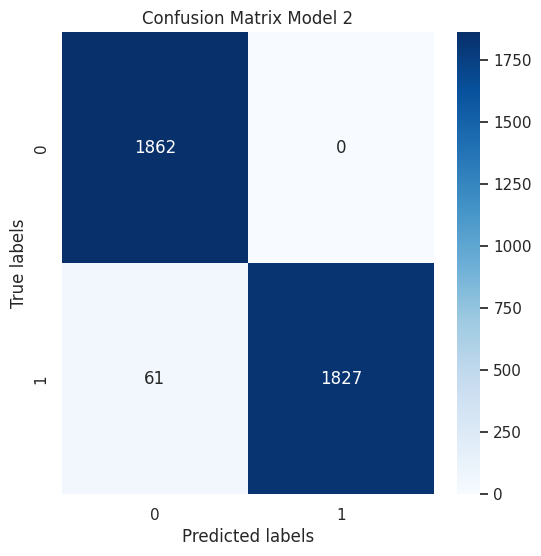

In [ ]:
# svm 모델 confusion matrix

y_pred_svm1 = svm1.predict(X_test_bc)
conf_matrix_model2 = confusion_matrix(y_test_bc, y_pred_svm1)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# 혼동 행렬 시각화
sns.heatmap(conf_matrix_model2, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix Model 2')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()


이진 분류에 사용되는 모델은 SVM
다중 분류에 사용되는 모델은 랜덤 포레스트
최적화된 모델 찾고 저장하기

In [ ]:
'''

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# SVM 모델 생성
svm_model = svm.SVC()

# 하이퍼파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10, 100],   # C 값 (정규화 파라미터)
    'gamma': [1, 0.1, 0.01, 0.001],  # gamma 값 (RBF 커널 파라미터)
    'kernel': ['rbf', 'linear']  # 커널 종류 (RBF, 선형 커널)
}

# GridSearchCV 설정 (cv=5는 5-폴드 교차 검증을 의미)
grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=2, cv=5)

# 최적의 파라미터를 찾기 위해 학습
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print(f'Best Parameters: {grid_search.best_params_}')

# 최적의 파라미터로 학습된 모델로 테스트 데이터 예측
y_pred = grid_search.predict(X_test)

# 성능 평가
print(classification_report(y_test, y_pred))
'''
#10분걸림;

"\n\nfrom sklearn import svm\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import classification_report\n\n# SVM 모델 생성\nsvm_model = svm.SVC()\n\n# 하이퍼파라미터 그리드 정의\nparam_grid = {\n    'C': [0.1, 1, 10, 100],   # C 값 (정규화 파라미터)\n    'gamma': [1, 0.1, 0.01, 0.001],  # gamma 값 (RBF 커널 파라미터)\n    'kernel': ['rbf', 'linear']  # 커널 종류 (RBF, 선형 커널)\n}\n\n# GridSearchCV 설정 (cv=5는 5-폴드 교차 검증을 의미)\ngrid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=2, cv=5)\n\n# 최적의 파라미터를 찾기 위해 학습\ngrid_search.fit(X_train, y_train)\n\n# 최적의 파라미터 출력\nprint(f'Best Parameters: {grid_search.best_params_}')\n\n# 최적의 파라미터로 학습된 모델로 테스트 데이터 예측\ny_pred = grid_search.predict(X_test)\n\n# 성능 평가\nprint(classification_report(y_test, y_pred))\n"

In [ ]:
'''
import joblib
joblib.dump(grid_search.best_estimator_, 'optimized_svm_model.pkl')

print("최적화된 svm 모델이 'optimized_svm_model.pkl'로 저장되었습니다.")
'''

'\nimport joblib\njoblib.dump(grid_search.best_estimator_, \'optimized_svm_model.pkl\')\n\nprint("최적화된 svm 모델이 \'optimized_svm_model.pkl\'로 저장되었습니다.")\n'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Random Forest 모델 생성
rf_model = RandomForestClassifier(random_state=0)

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [50, 100, 200],  # 트리의 개수
    'max_depth': [10, 20, 30, None],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 노드를 분할하기 위한 최소 샘플 수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드에 있어야 하는 최소 샘플 수
    'bootstrap': [True, False]  # 부트스트랩 샘플링 사용 여부
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# 최적의 파라미터를 찾기 위해 학습
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print(f'Best Parameters: {grid_search.best_params_}')

# 최적의 파라미터로 학습된 모델로 테스트 데이터 예측
y_pred = grid_search.predict(X_test)

# 성능 평가
print(classification_report(y_test, y_pred))

# 최적화된 모델 저장
joblib.dump(grid_search.best_estimator_, 'optimized_rf_model.pkl')

print("최적화된 랜덤 포레스트 모델이 'optimized_rf_model.pkl'로 저장되었습니다.")
